# **Image Classifier using Keras and TensorFlow**

Classifier image from MNIST dataset by using simple CNN architecture with tensorflow and keras

Steps to Implement
1. Import necessary Libraries
2. Load the MNIST Dataset
3. Build Model
4. Train Model
5. Evaluate and Make Predicions

In [16]:
# Import neccesary Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Load the MNIST dataset
(train_images, train_labes), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Preprocessing: Normalize the pixels value between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0


In [5]:
# Reshape the images to  (28,28,1) as they are grayscale
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [6]:
# Convert the label to one-hot encoded format
train_labes = to_categorical(train_labes)
test_labels = to_categorical(test_labels)


In [9]:
def build_model():
  model = models.Sequential()
  # First Convolutional layer
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2,2 )))
  # Second
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2 )))
  # Third
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  # Flatten the 3D output to 1D and add a Dense layer
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  # Output layer with 10 classes
  model.add(layers.Dense(10, activation='softmax'))
  return model



In [10]:
# Compile model
model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train model
model.fit(train_images, train_labes, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 63ms/step - accuracy: 0.8693 - loss: 0.4368 - val_accuracy: 0.9803 - val_loss: 0.0593
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 59ms/step - accuracy: 0.9833 - loss: 0.0543 - val_accuracy: 0.9874 - val_loss: 0.0397
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9881 - loss: 0.0356 - val_accuracy: 0.9891 - val_loss: 0.0314
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.9927 - loss: 0.0249 - val_accuracy: 0.9908 - val_loss: 0.0309
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 59ms/step - accuracy: 0.9932 - loss: 0.0223 - val_accuracy: 0.9903 - val_loss: 0.0310


In [14]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9866 - loss: 0.0426
Test accuracy: 99.03%


In [22]:
# Make prediction on test images
predictions = model.predict(test_images)
print(f'Prediction for the first image: {np.argmax(predictions[4])}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Prediction for the first image: 4


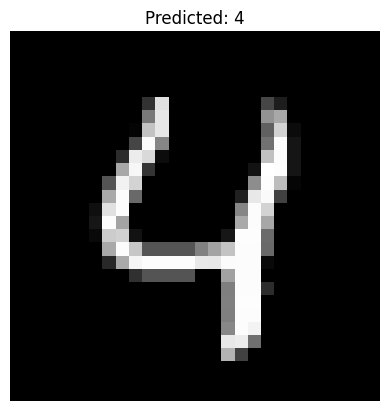

In [23]:
plt.imshow(test_images[4].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {np.argmax(predictions[4])}')
plt.axis('off')
plt.show()